In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
m1=np.array([[1,2],[3,1]])

In [18]:
#回転
theta=np.pi/4
cos,sin=np.cos(theta),np.sin(theta)
R=np.array([
    [cos,-sin],
    [sin,cos]
])
print(f'回転: {theta}\n',m1@R)

回転: 0.7853981633974483
 [[ 2.12132034  0.70710678]
 [ 2.82842712 -1.41421356]]


In [19]:
#拡大
n=3
expansion=np.array([
    [n,0],
    [0,n]
])
print(f'拡大: {n}\n',m1@expansion)

拡大: 3
 [[3 6]
 [9 3]]


In [20]:
#せん断
a=1
shear=np.array([
    [1,a],
    [0,1]
])
print(f'せん断: {a}\n',m1@shear)

せん断: 1
 [[1 3]
 [3 4]]


In [21]:
#32回転行列とその合成
phi=np.pi/3
cos2,sin2=np.cos(phi),np.sin(phi)
R2=np.array([
    [cos2,-sin2],
    [sin2,cos2]
])
print(R@R2)
print(R2@R)

[[-0.25881905 -0.96592583]
 [ 0.96592583 -0.25881905]]
[[-0.25881905 -0.96592583]
 [ 0.96592583 -0.25881905]]


C:\Users\katet\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\katet\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\katet\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\katet\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24213 (\N{CJK UNIFIED IDEOGRAPH-5E95}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


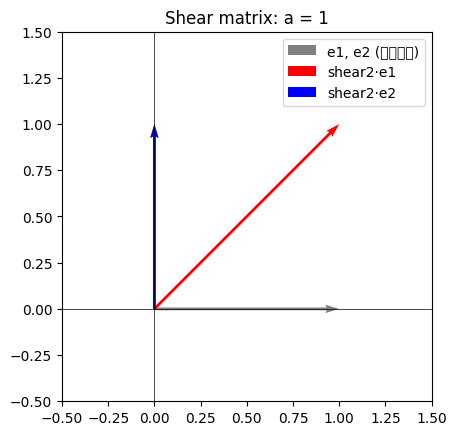

In [22]:
#33せん断行列
# Identity (元の基底)

I = np.eye(2)

# Shear 行列（パラメータ a を好きな値に）
a = 1
shear2 = np.array([[1, 0],
                   [a, 1]])

# 元の基底ベクトル
e1 = I[:, 0]    # (1, 0)
e2 = I[:, 1]    # (0, 1)

# Shear 後のベクトル
v1 = shear2.dot(e1)   # -> (1, a)
v2 = shear2.dot(e2)   # -> (0, 1)

plt.figure()
# 元のベクトルを薄いグレーで
plt.quiver(0, 0, e1[0], e1[1],
           angles='xy', scale_units='xy', scale=1,
           color='gray', label='e1, e2 (元の基底)')
plt.quiver(0, 0, e2[0], e2[1],
           angles='xy', scale_units='xy', scale=1,
           color='gray')

# shear 後のベクトルを赤と青で
plt.quiver(0, 0, v1[0], v1[1],
           angles='xy', scale_units='xy', scale=1,
           color='r', label='shear2·e1')
plt.quiver(0, 0, v2[0], v2[1],
           angles='xy', scale_units='xy', scale=1,
           color='b', label='shear2·e2')

# 軸の範囲を shear の大きさに合わせて調整
margin = 0.5
all_x = [e1[0], e2[0], v1[0], v2[0]]
all_y = [e1[1], e2[1], v1[1], v2[1]]
plt.xlim(min(all_x)-margin, max(all_x)+margin)
plt.ylim(min(all_y)-margin, max(all_y)+margin)

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.title(f'Shear matrix: a = {a}')
plt.show()


In [23]:
#34行列のランク
rank=np.linalg.matrix_rank(m1)
print(rank)
m2=np.array([
    [0,0,0],
    [1,1,1],
    [0,0,1]
])
rank2=np.linalg.matrix_rank(m2)
print(rank2)
m3=np.array([
    [1,0,0,1],
    [0,1,1,0],
    [0,1,1,0],
    [1,0,0,1]
])
rank3=np.linalg.matrix_rank(m3)
print(rank3)

2
2
2


In [24]:
#行列のランク２
def row_swap(A,i,j):
    A[i],A[j]=A[j],A[i]

def row_scale(A,i,k):
    if k==0:
        raise ValueError('k must be non-zero')
    A[i]=[k*x for x in A[i]]

def row_add(A,src,dest,k):
    A[dest]=[d+k*s for d,s in zip(A[dest],A[src])]

def gaussian_elmination(mat):
    m,n=len(mat),len(mat[0])
    pivot_cols=[]
    row=0
    for col in range(n):
        sel=max(range(row,m),key=lambda r: abs(mat[r][col]))
        if abs(mat[sel][col])<1**(-12):
            continue
        row_swap(mat,row,sel)
        pivot_cols.append(col)
        
        pivot=mat[row][col]
        mat[row]=[x/pivot for x in mat[row]]
        
        for r in range(m):
            if r==row:
                continue
            factor=mat[r][col]
            row_add(mat,row,r,-factor)
        row+=1
        if row==m:
            break
    return pivot_cols

In [25]:
A=[
    [2,1,5,8],
    [4,-6,-2,5],
    [2,3,2,4]
]

pivots=gaussian_elmination(A)

for r in A:
    print(r)

[1.0, 0.0, 0.0, 1.34375]
[0.0, 1.0, 0.0, -0.3125]
[0.0, 0.0, 1.0, 1.125]


In [28]:
A=np.array([
    [2,1,5],
    [4,-6,-2],
    [2,3,2]
])
#36　逆行列
Ainv=np.linalg.inv(A)
print(Ainv)

[[-0.0625      0.13541667  0.29166667]
 [-0.125      -0.0625      0.25      ]
 [ 0.25       -0.04166667 -0.16666667]]


In [ ]:

B=np.array([
    [1,2],
    [3,4]
])
D=[[1,1],
   [1,1]]
#37 逆行列２
def d2inv(A):
    a,b,c,d=A[0][0],A[0][1],A[1][0],A[1][1]
    if a*d-b*c==0:
        raise ValueError('A-1 not exist')
    det=1/(a*d-b*c)
    B=np.array([
        [det*d,det*(-b)],
        [det*(-c),det*a]
    ])
    return B

c=d2inv(B)
print(c)
#38逆行列が存在しない行列
print(d2inv(D))

In [33]:
#39行列式
det=np.linalg.det(B)
print(det)

-2.0000000000000004


In [34]:
#40行列式２
def d3det(A):
    A = np.asarray(A, dtype=float)

    if A.shape != (3, 3):
        raise ValueError("det3: 3×3 行列だけが対象です")

    a11, a12, a13 = A[0]
    a21, a22, a23 = A[1]
    a31, a32, a33 = A[2]

    return (
        a11 * (a22 * a33 - a23 * a32)
      - a12 * (a21 * a33 - a23 * a31)
      + a13 * (a21 * a32 - a22 * a31)
    )

print(d3det(A))

96.0
